In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import gravitational_constant as G

### 1D test

In [ ]:
# ODE

def f(y,x):
     return 2*x

dx = .1
x = np.arange(-10,10,dx) 
y = np.zeros([len(x)])
#y0 = 0 
y[0] = 0

# Euler
for n in range(1,len(x)):
      y[n] = y[n-1] + f(y, x[n-1])*dx
# or
      #y[n] = y[n-1] + 2*x[n-1]*dx

#print(y)
#print(len(x))
plt.plot(x,y,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler')
plt.show()

In [ ]:
# rk 1

def rk1(y,x,dx):
    k1 = dx * f(y,x)
    k2 = dx * f(y + .5*k1, x + .5*dx)
    k3 = dx * f(y + .5*k2, x + .5*dx)
    k4 = dx * f(y + k3, x + dx)
    return (k1 + 2*k2 + 2*k3 + k4)/6
    
for n in range(1,len(x)):
        y[n] = y[n-1] + rk1(y[n-1],x[n-1],dx)

#print(y)
plt.plot(x,y,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4')
plt.show()

### 1D drag 

In [ ]:
# ODE
def f(v,t):
     return (m*g-b*v)/m
    
dt = .1
t = np.arange(0,10,dt) 
v = np.zeros([len(t)])
#v0 = 0 
v[0] = 0 #initial velocity
#v[len(t)-1] = m*g/b #terminal velocity
m = 2
g = 9.8
b = 1

# Euler
for n in range(1,len(t)):
      v[n] = v[n-1] + f(v[n-1], t[n-1])*dt
# or
      #v[n] = v[n-1] + ((m*g-b*v[n-1])/m)*dx

plt.plot(t,v,'b')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('velocity of free falling object with drag force - Euler')
plt.show()

In [ ]:
# rk 2

def rk2(v,t,dt):
    k1 = dt * f(v,t)
    k2 = dt * f(v + .5*k1, t + .5*dt)
    k3 = dt * f(v + .5*k2, t + .5*dt)
    k4 = dt * f(v + k3, t + dt)
    return (k1 + 2*k2 + 2*k3 + k4)/6

for n in range(1,len(t)):
        v[n] = v[n-1] + rk2(v[n-1],t[n-1],dt)
        
#print(v)
plt.plot(t,v,'b')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('velocity of free falling object with drag force - RK4')
plt.show()

In [ ]:
print(v)

In [ ]:
# euler position

x = np.zeros([len(t)])
x[0] = 0 #initial position

for n in range(1,len(t)):
    x[n] = x[n-1] + v[n-1]*dt
    
print(x)
plt.plot(t,x,'b')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.title('position of free falling object with drag force - Euler')
plt.show()

In [ ]:
# rk 2
def rk2(v,t,dt):
    
    k1 = dt * f(v,t)
    m1 = dt * v
    k2 = dt * f(v + .5*k1, t + .5*dt)
    m2 = dt * (v + k1/2)
    k3 = dt * f(v + .5*k2, t + .5*dt)
    m3 = dt * (v + k2/2)
    k4 = dt * f(v + k3, t + dt)
    m4 = dt * (v + k3)
    
    return (k1 + 2*k2 + 2*k3 + k4)/6
    return (m1 + 2*m2 + 2*m3 + m4)/6


for n in range(1,len(t)):
        x[n] = x[n-1] + v[n-1]*dt
        
print(x)
plt.plot(t,x,'b')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.title('position of free falling object with drag force - RK4')
plt.show()


### 2D projectile 

In [ ]:
#original projectile function - Euler

dt = .1
t = np.arange(0,10,dt)

vx = np.zeros(len(t))
vy = np.zeros(len(t))
rx = np.zeros(len(t))
ry = np.zeros(len(t))

v0 = 25
theta = np.pi/6 # launch angle
vx[0] = v0*np.cos(theta)   # initial x velocity
vy[0] = v0*np.sin(theta)   # initial y velocity
rx[0] = 0   # initial x position
ry[0] = 0   #initial y position

m = 5 #kg
g = 9.8
b = 1

def fx(vx,t): # dvx/dt
         return -b*vx/m 

def fy(vy,t): # dvy/dt
         return (-b * vy - m*g)/m 

for n in range(1,len(t)): # Euler
    vx[n] = vx[n-1] + fx(vx[n-1], t[n-1])*dt
    vy[n] = vy[n-1] + fy(vy[n-1], t[n-1])*dt
    rx[n] = rx[n-1] + vx[n-1]*dt
    ry[n] = ry[n-1] + vy[n-1]*dt
    
plt.plot(rx, ry, 'b')
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('projectile motion - Euler')
plt.xlim(-5,50)
plt.ylim(0,10)
plt.show()

In [ ]:
print(ry[24])
print(rx[24])

In [ ]:
#modified projectile function - Euler

dt = .1
t = np.arange(0,10,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
rx = np.zeros([len(t)])
ry = np.zeros([len(t)])

v0 = 25
theta = np.pi/6 # launch angle
vx[0] = v0*np.cos(theta)   # initial x velocity
vy[0] = v0*np.sin(theta)   # initial y velocity
rx[0] = 0   # initial x position
ry[0] = 0   #initial y position

m = 5 #kg
g = 9.8
b = 1

def fx(rx,t): # dvx/dt
         return -b * rx/m 

def fy(ry,t): # dvy/dt
         return (-b * ry - m*g)/m 

for n in range(1,len(t)): # Euler
    #vx[n] = vx[n-1] + fx(vx[n-1], t[n-1])*dt
    vx[n] = vx[n-1] + fx(rx[n-1], t[n-1])*dt
    #vy[n] = vy[n-1] + fy(vy[n-1], t[n-1])*dt
    vy[n] = vy[n-1] + fy(ry[n-1], t[n-1])*dt
    rx[n] = rx[n-1] + vx[n-1]*dt
    ry[n] = ry[n-1] + vy[n-1]*dt
    
plt.plot(rx, ry, 'b')
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('projectile motion - Euler')
plt.xlim(-5,50)
plt.ylim(0,10)
plt.show()



In [ ]:
print(ry[24])
print(rx[24])

In [ ]:
#original projectile function - RK

def fx(vx,t): # dvx/dt
         return -b*vx/m 

def fy(vy,t): # dvy/dt
         return (-b * vy - m*g)/m 

def rkx(vx,t,dt):
    
    kx1 = dt * fx(vx,t)
    mx1 = dt * vx
    kx2 = dt * fx(vx + .5*kx1, t + .5*dt)
    mx2 = dt * (vx + kx1/2)
    kx3 = dt * fx(vx + .5*kx2, t + .5*dt)
    mx3 = dt * (vx + kx2/2)
    kx4 = dt * fx(vx + kx3, t + dt)
    mx4 = dt * (vx + kx3)
    
    return (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    return (mx1 + 2*mx2 + 2*mx3 + mx4)/6

def rky(vy,t,dt):
    
    ky1 = dt * fy(vy,t)
    my1 = dt * vy
    ky2 = dt * fy(vy + .5*ky1, t + .5*dt)
    my2 = dt * (vy + ky1/2)
    ky3 = dt * fy(vy + .5*ky2, t + .5*dt)
    my3 = dt * (vy + ky2/2)
    ky4 = dt * fy(vy + ky3, t + dt)
    my4 = dt * (vy + ky3)
    
    return (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    return (my1 + 2*my2 + 2*my3 + my4)/6

for n in range(1,len(t)):
    vx[n] = vx[n-1] + rkx(vx[n-1],t[n-1],dt)
    vy[n] = vy[n-1] + rky(vy[n-1],t[n-1],dt)
    rx[n] = rx[n-1] + vx[n-1]*dt
    ry[n] = ry[n-1] + vy[n-1]*dt
        
        
plt.plot(rx, ry, 'b')
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('projectile motion - RK4')
plt.xlim(-5,50)
plt.ylim(0,10)
plt.show()
        

In [ ]:
print(rx[24])
print(ry[24])

In [ ]:
#modified projectile function - RK

def fx(rx,t): # dvx/dt
         return -b* rx/m 

def fy(ry,t): # dvy/dt
         return (-b * ry - m*g)/m 

    
def rkx(x,t,dt):
    
    kx1 = dt * fx(rx,t)
    mx1 = dt * vx
    kx2 = dt * fx(rx + .5*kx1, t + .5*dt)
    mx2 = dt * (vx + kx1/2)
    kx3 = dt * fx(rx + .5*kx2, t + .5*dt)
    mx3 = dt * (vx + kx2/2)
    kx4 = dt * fx(rx + kx3, t + dt)
    mx4 = dt * (vx + kx3)
    
    return (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    return (mx1 + 2*mx2 + 2*mx3 + mx4)/6

def rky(y,t,dt):
    
    ky1 = dt * fy(ry,t)
    my1 = dt * vy
    ky2 = dt * fy(ry + .5*ky1, t + .5*dt)
    my2 = dt * (vy + ky1/2)
    ky3 = dt * fy(ry + .5*ky2, t + .5*dt)
    my3 = dt * (vy + ky2/2)
    ky4 = dt * fy(ry + ky3, t + dt)
    my4 = dt * (vy + ky3)
    
    return (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    return (my1 + 2*my2 + 2*my3 + my4)/6

for n in range(1,len(t)): 
    #vx[n] = vx[n-1] + fx(vx[n-1], t[n-1])*dt
    vx[n] = vx[n-1] + fx(rx[n-1], t[n-1])*dt
    #vy[n] = vy[n-1] + fy(vy[n-1], t[n-1])*dt
    vy[n] = vy[n-1] + fy(ry[n-1], t[n-1])*dt
    rx[n] = rx[n-1] + vx[n-1]*dt
    ry[n] = ry[n-1] + vy[n-1]*dt
        
plt.plot(rx, ry, 'b')
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
plt.title('projectile motion - RK4')
plt.xlim(-5,50)
plt.ylim(0,10)
plt.show()
        

In [ ]:
print(rx[22])
print(ry[22])

In [ ]:
from scipy.constants import gravitational_constant as grav

### Polar

In [ ]:
m1 = m_sun = 3*10**30 #kg
m2 = m_earth = 6*10**24 #kg
mu = m1*m2/(m1+m2)
a = 1.49598*10**8 #km
b = 1.49577*10**8 #kn
L = 2.7*10**40
E = 2.7*10**33
#L = np.sqrt(grav*m1/a) 
#E = -grav*m1*m2/(2*a)

In [ ]:
#for orbit centered at origin

dr = .1

r = np.arange(10,20,dr)
#r = np.arange(1,21000,100)

theta = np.zeros(len(r))
theta[0] = 204

def f(theta, r):
    return (L/np.sqrt(2*mu))*1/(r**2*np.sqrt(E-L**2/(2*mu*r**2)+grav*m1*m2/r))

def rk(theta, r, dr):
    k1 = dr * f(theta,r)
    k2 = dr * f(theta + .5*k1, r + .5*dr)
    k3 = dr * f(theta + .5*k2, r + .5*dr)
    k4 = dr * f(theta + k3, r + dr)
    return (k1 + 2*k2 + 2*k3 + k4)/6

for n in range(1,len(r)):
        theta[n] = theta[n-1] + rk(theta[n-1], r[n-1], dr)
        
#x = a*np.cos(theta)
#y = b*np.sin(theta)

#plt.plot(r,theta)
#plt.plot(x, y)
#plt.xlabel('position')
#plt.ylabel('angular position')
#plt.show()

plt.polar(r)
#plt.polar(x, y)
plt.show()

### Cartesian 

In [2]:
#inputs and functions

dt = .0001
t = np.arange(0,4.5,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10 #30*10**3
vy[0] = 10 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 20 #6*10**24
G = 100 #6.67*10**-11

def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)


for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

In [ ]:
#Euler
for n in range(1,len(t)):
vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
x[n] = x[n-1] + vx[n-1]*dt
y[n] = y[n-1] + vy[n-1]*dt

In [ ]:
for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y,'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Unrealistic orbit - Euler; M = 20, G = 100, r0 = (10,0), v0 = (10,10), dt = .0001, t = [0,4.5]')
plt.show()

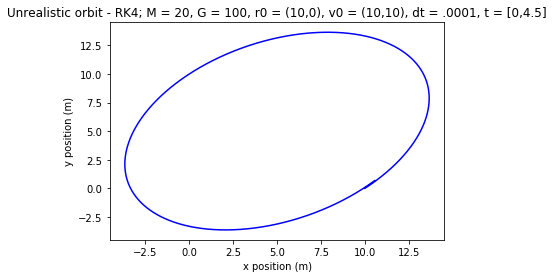

In [4]:
# Runge-Kutta 
def rkx(x,y,t,dt):
    kx1 = dt * fx(x,y,t)
    mx1 = dt * vx
    kx2 = dt * fx(x + .5*kx1, y + .5*kx1, t + .5*dt)
    mx2 = dt * (vx + kx1/2)
    kx3 = dt * fx(x + .5*kx2, y + .5*kx2, t + .5*dt)
    mx3 = dt * (vx + kx2/2)
    kx4 = dt * fx(x + kx3, y + kx3, t + dt)
    mx4 = dt * (vx + kx3)
    
    return (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    return (mx1 + 2*mx2 + 2*mx3 + mx4)/6

def rky(x,y,t,dt):
    ky1 = dt * fy(x,y,t)
    my1 = dt * vy
    ky2 = dt * fy(x + .5*ky1, y + .5*ky1, t + .5*dt)
    my2 = dt * (vy + ky1/2)
    ky3 = dt * fy(x + .5*ky2, y + .5*ky2, t + .5*dt)
    my3 = dt * (vy + ky2/2)
    ky4 = dt * fy(x + ky3, y + ky3, t + dt)
    my4 = dt * (vy + ky3)
    
    return (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    return (my1 + 2*my2 + 2*my3 + my4)/6

for n in range(1,len(t)):
    vx[n] = vx[n-1] + rkx(x[n-1],y[n-1],t[n-1],dt)
    vy[n] = vy[n-1] + rky(x[n-1],y[n-1],t[n-1],dt)
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt
    
plt.plot(x,y,'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Unrealistic orbit - RK4; M = 20, G = 100, r0 = (10,0), v0 = (10,10), dt = .0001, t = [0,4.5]')
plt.show()

### Scale

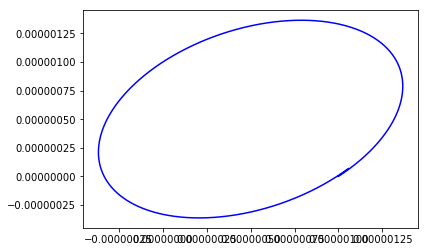

In [7]:
x = x/1000
y = y/1000
plt.plot(x,y,'b')
plt.show()

### variations with euler

In [ ]:
M = 2*10**14
G = 3*10**-11

def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt
    
plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 2x10^14, G = 3x10^-11, r0 = (0,10), v0 = (10,10), time step = .0001, time interval = [0,4.5]')
plt.show()

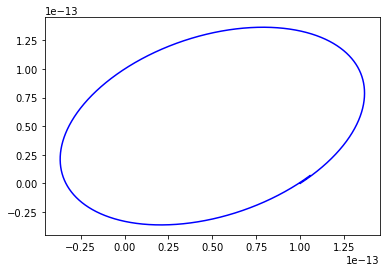

In [9]:
x = x/10000
y = y/10000
plt.plot(x,y, 'b')
plt.show()

In [ ]:
dt = .0001
t = np.arange(0,4.5,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10 #30*10**3
vy[0] = 10 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 4*10**14
G = 6.67*10**-11

def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt
    
plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 4x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (10,10), time step = .0001, time interval = [0,4.5]')
plt.show()

In [ ]:
dt = .0001
t = np.arange(0,20,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10 #30*10**3
vy[0] = 10 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 1*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 1x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (10,10), time step = .0001, time interval = [0,20]')
plt.show()

#### Why would 10^14 be special??

###### decreasing the time step:

In [ ]:
dt = .00001
t = np.arange(0,20,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10 #30*10**3
vy[0] = 10 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 1*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 1x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (10,10), time step = .00001, time interval = [0,20]')
plt.show()

###### What does such a different result mean?!

###### increasing initial velocity and x position:

In [ ]:
dt = .00001
t = np.arange(0,20,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 20 #30*10**3
vy[0] = 20 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 1*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 1x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (20,20), time step = .00001, time interval = [0,20]')
plt.show()

###### why does doubling the initial velocities make the orbit so much more accurate? And why does anything besides 20 behave terribly?

In [ ]:
dt = .00001
t = np.arange(0,20,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 25 #30*10**3
vy[0] = 25 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 1*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 1x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (25,25), time step = .00001, time interval = [0,20]')
plt.show()

###### how could adding 5 m/s to the initial velocities produce such a different result?

##### adding some more time:

In [ ]:
dt = .00001
t = np.arange(0,70,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 25 #30*10**3
vy[0] = 25 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 1*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 1x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (20,20), time step = .00001, time interval = [0,70]')
plt.show()

In [ ]:
dt = .00001
t = np.arange(0,90,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 30 #30*10**3
vy[0] = 30 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 2*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 2x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (30,30), time step = .00001, time interval = [0,90]')
plt.show()

###### but that thick part means it's going around a bunch of times, which shouldn't be happening, I don't think.

In [ ]:
dt = .00001
t = np.arange(0,90,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 35 #30*10**3
vy[0] = 35 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 2*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 2x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (35,35), time step = .00001, time interval = [0,90]')
plt.show()

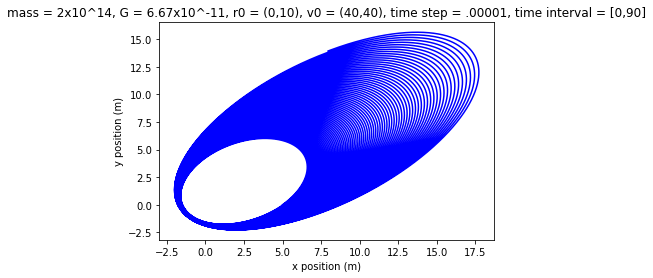

In [10]:
dt = .00001
t = np.arange(0,90,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 35 #30*10**3
vy[0] = 35 #30*10**3
x[0] = 5 #150*10**6
y[0] = 0

M = 2*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 2x10^14, G = 6.67x10^-11, r0 = (0,10), v0 = (40,40), time step = .00001, time interval = [0,90]')
plt.show()

In [ ]:
dt = .00001
t = np.arange(0,10**6,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10**3 #30*10**3
vy[0] = 10**3 #30*10**3
x[0] = 10**6 #150*10**6
y[0] = 0

M = 2*10**20 #2*10**14
G = 6.67*10**-11


def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)

for n in range(1,len(t)):
    vx[n] = vx[n-1] + fx(x[n-1],y[n-1],t[n-1])*dt
    vy[n] = vy[n-1] + fy(x[n-1],y[n-1],t[n-1])*dt
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt

x = x/10000
y = y/10000

plt.plot(x,y, 'b')
plt.show()
plt.plot(x,y, 'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass: 2*10**14, G: actual, time step: .00001, time interval: [0,70]')
plt.show()

### variations with runge-kutta

In [ ]:
dt = .0001
t = np.arange(0,20,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10 #30*10**3
vy[0] = 10 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 2*10**14 #6*10**24
G = 3*10**-11 #6.67*10**-11

def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)
def rkx(x,y,t,dt):
    
    kx1 = dt * fx(x,y,t)
    mx1 = dt * vx
    kx2 = dt * fx(x + .5*kx1, y + .5*kx1, t + .5*dt)
    mx2 = dt * (vx + kx1/2)
    kx3 = dt * fx(x + .5*kx2, y + .5*kx2, t + .5*dt)
    mx3 = dt * (vx + kx2/2)
    kx4 = dt * fx(x + kx3, y + kx3, t + dt)
    mx4 = dt * (vx + kx3)
    
    return (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    return (mx1 + 2*mx2 + 2*mx3 + mx4)/6

def rky(x,y,t,dt):
    
    ky1 = dt * fy(x,y,t)
    my1 = dt * vy
    ky2 = dt * fy(x + .5*ky1, y + .5*ky1, t + .5*dt)
    my2 = dt * (vy + ky1/2)
    ky3 = dt * fy(x + .5*ky2, y + .5*ky2, t + .5*dt)
    my3 = dt * (vy + ky2/2)
    ky4 = dt * fy(x + ky3, y + ky3, t + dt)
    my4 = dt * (vy + ky3)
    
    return (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    return (my1 + 2*my2 + 2*my3 + my4)/6

for n in range(1,len(t)):
    vx[n] = vx[n-1] + rkx(x[n-1],y[n-1],t[n-1],dt)
    vy[n] = vy[n-1] + rky(x[n-1],y[n-1],t[n-1],dt)
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt
    
plt.plot(x,y,'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 2x10^14, G = 3x10^-11 actual, time step: .0001, time interval: [0,20]')
plt.show()

In [ ]:
dt = .0001
t = np.arange(0,4.5,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 10 #30*10**3
vy[0] = 10 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 9000 #6*10**24
G = 1 #6.67*10**-11

def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)
    
def rkx(x,y,t,dt):
    
    kx1 = dt * fx(x,y,t)
    mx1 = dt * vx
    kx2 = dt * fx(x + .5*kx1, y + .5*kx1, t + .5*dt)
    mx2 = dt * (vx + kx1/2)
    kx3 = dt * fx(x + .5*kx2, y + .5*kx2, t + .5*dt)
    mx3 = dt * (vx + kx2/2)
    kx4 = dt * fx(x + kx3, y + kx3, t + dt)
    mx4 = dt * (vx + kx3)
    
    return (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    return (mx1 + 2*mx2 + 2*mx3 + mx4)/6

def rky(x,y,t,dt):
    
    ky1 = dt * fy(x,y,t)
    my1 = dt * vy
    ky2 = dt * fy(x + .5*ky1, y + .5*ky1, t + .5*dt)
    my2 = dt * (vy + ky1/2)
    ky3 = dt * fy(x + .5*ky2, y + .5*ky2, t + .5*dt)
    my3 = dt * (vy + ky2/2)
    ky4 = dt * fy(x + ky3, y + ky3, t + dt)
    my4 = dt * (vy + ky3)
    
    return (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    return (my1 + 2*my2 + 2*my3 + my4)/6

for n in range(1,len(t)):
    vx[n] = vx[n-1] + rkx(x[n-1],y[n-1],t[n-1],dt)
    vy[n] = vy[n-1] + rky(x[n-1],y[n-1],t[n-1],dt)
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt
    
plt.plot(x,y,'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 2000, G = 1, r0 = (10,0), v0 = (10,10), dt = .0001, t = [0,4.5]')
plt.show()

In [ ]:
dt = .00001
t = np.arange(0,10,dt)
#t = np.arange(0,3.15*10**7,dt)

vx = np.zeros([len(t)])
vy = np.zeros([len(t)])
x = np.zeros([len(t)])
y = np.zeros([len(t)])


vx[0] = 25 #30*10**3
vy[0] = 25 #30*10**3
x[0] = 10 #150*10**6
y[0] = 0

M = 2000 #6*10**24
G = 1 #6.67*10**-11

def fx(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*x/np.power(x**2+y**2,3/2)

def fy(x,y,t):
    #for n in range(1,len(t)):
        return -G*M*y/np.power(x**2+y**2,3/2)
    
def rkx(x,y,t,dt):
    
    kx1 = dt * fx(x,y,t)
    mx1 = dt * vx
    kx2 = dt * fx(x + .5*kx1, y + .5*kx1, t + .5*dt)
    mx2 = dt * (vx + kx1/2)
    kx3 = dt * fx(x + .5*kx2, y + .5*kx2, t + .5*dt)
    mx3 = dt * (vx + kx2/2)
    kx4 = dt * fx(x + kx3, y + kx3, t + dt)
    mx4 = dt * (vx + kx3)
    
    return (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    return (mx1 + 2*mx2 + 2*mx3 + mx4)/6

def rky(x,y,t,dt):
    
    ky1 = dt * fy(x,y,t)
    my1 = dt * vy
    ky2 = dt * fy(x + .5*ky1, y + .5*ky1, t + .5*dt)
    my2 = dt * (vy + ky1/2)
    ky3 = dt * fy(x + .5*ky2, y + .5*ky2, t + .5*dt)
    my3 = dt * (vy + ky2/2)
    ky4 = dt * fy(x + ky3, y + ky3, t + dt)
    my4 = dt * (vy + ky3)
    
    return (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    return (my1 + 2*my2 + 2*my3 + my4)/6

for n in range(1,len(t)):
    vx[n] = vx[n-1] + rkx(x[n-1],y[n-1],t[n-1],dt)
    vy[n] = vy[n-1] + rky(x[n-1],y[n-1],t[n-1],dt)
    x[n] = x[n-1] + vx[n-1]*dt
    y[n] = y[n-1] + vy[n-1]*dt
    
plt.plot(x,y,'b')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('mass = 20000, G = .1, r0 = (10,0), v0 = (10,10), dt = .0001, t = [0,4.5]')
plt.show()